In [1]:
from signals.artificial_signals import *
from recurrence_plots.recurrence_plot import RecurrencePlot
from embeddings.lag_emebedding import LagEmbedding
from embeddings.utils.mutual_information import mutual_information
from embeddings.utils.fnn import fnn
import numpy as np

In [2]:
def euclidean_dist(x: np.array, y: np.array) -> float:
    dist: float = np.linalg.norm(x - y)
    return dist

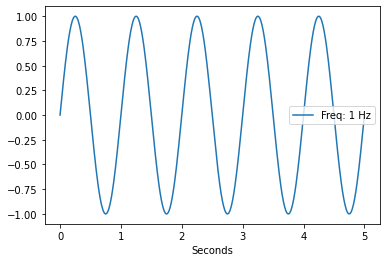

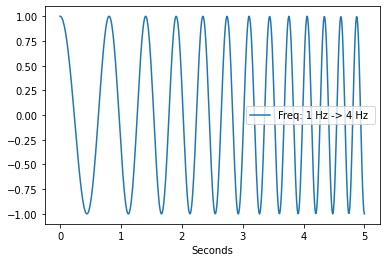

In [3]:
secs = 5
Fs = 100
s1 = Sinusoid(frequency=1, sec=secs, sampling_rate=Fs)
s1.show()
s2 = Chirp(frequency_start=1, frequency_end=4, sec=secs, sampling_rate=Fs)
s2.show()

In [4]:
s1.data.shape

(500, 1)

In [5]:
s = np.vstack([s1.data.T, s2.data.T]).T
s.shape
type(s)

numpy.ndarray

In [6]:
lag = mutual_information(s)

/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))


In [7]:
dim = fnn(s, lag=lag)

In [8]:
embedding = LagEmbedding(dim=int(dim), lag=lag)
print(f"Lag: {lag} | Dim: {dim}")

Lag: 8 | Dim: 2


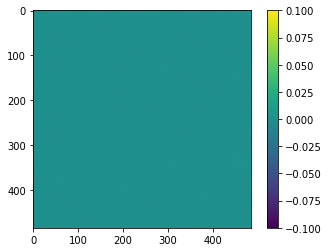

In [9]:
rp = RecurrencePlot(signal=s, embedding=embedding, metric = euclidean_dist)
rp.show()

235225it [00:03, 60739.94it/s]


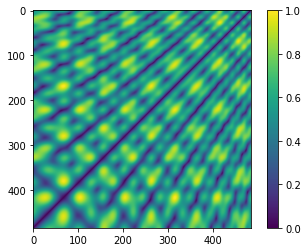

In [10]:
rp.generate()
rp.show()

In [11]:
from data_handling.physionet_reader import PhysioNetReader

In [12]:
reader = PhysioNetReader(path="../data/single_lead/physionet_challenge/training2017")
ds = reader.get_dataset()

In [18]:
idx = 11
signal = ds[idx].x.T[:2000, :].reshape(-1, 1)

lag = mutual_information(signal)
dim = fnn(signal, lag=lag)

embedding = LagEmbedding(dim=int(dim), lag=lag)
print(f"Lag: {lag} | Dim: {dim}")

Lag: 35 | Dim: 9


/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/FNN_n.py:72: RuntimeWarning: invalid value encountered in sqrt
  D_mp1 = np.sqrt(
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/FNN_n.py:76: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(abs(tsrecon[ind_m, -1]-tsrecon[ind, -1]), Dm)-Rtol,

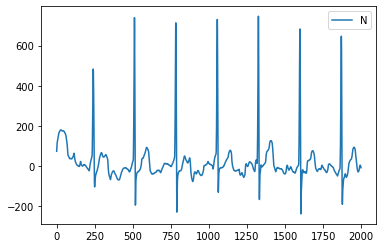

(2000, 1)

In [19]:
plt.plot(signal, label=ds[idx].y)
plt.legend()
plt.show()
signal.shape

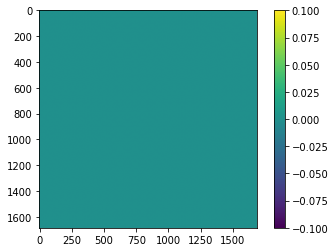

In [20]:
rp = RecurrencePlot(signal=signal, embedding=embedding, metric = euclidean_dist)
rp.show()

2842596it [00:32, 86339.49it/s] 


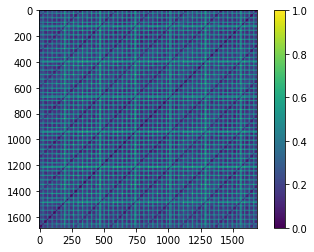

In [21]:
rp.generate()
rp.show()

In [22]:
len(signal)

2000